In [1]:
import os
# ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/FSDS_NOV_batch/ALL_NOTES/Day_001_Sep_03rd"
# os.chdir(ROOT)

In [2]:
os.getcwd()

'/home/pradeep.k@zucisystems.com/workspace_working_Repo/DataScience/M2_DL/M4_CNN'

In [3]:
os.listdir()

['M2_CNN.ipynb', '.ipynb_checkpoints', 'car1.jpeg', 'M1.ipynb']

In [4]:
img_path = 'car1.jpeg'

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # image related ops
import numpy as np
import cv2 # opencv lib

In [6]:
car1 = mpimg.imread(img_path)

In [7]:
car1.shape

(168, 300, 3)

In [8]:
type(car1)

numpy.ndarray

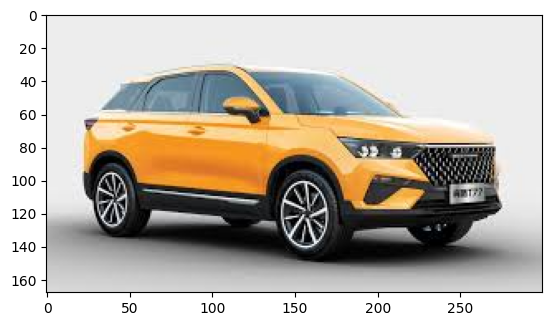

In [9]:
plt.imshow(car1)

In [10]:
car1[0][0]

array([237, 237, 237], dtype=uint8)

In [11]:
car1_cv2 = cv2.imread(img_path)

In [12]:
# cv2.imshow("image", car1_cv2) # Will work only in local pc

In [13]:
# from google.colab.patches import cv2_imshow
# cv2_imshow(car1_cv2)

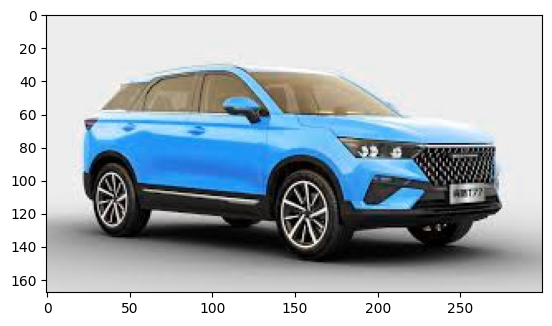

In [14]:
plt.imshow(car1_cv2) # cv2 reads images as BGR and in matplotlib reads as RGB

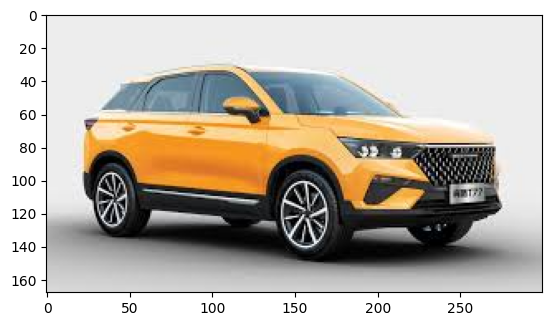

In [15]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

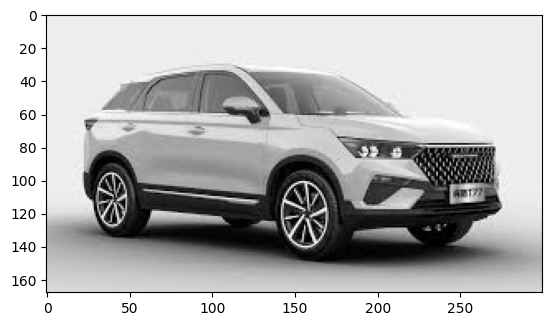

In [16]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [17]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [18]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max()

(0, 255)

# understanding composition of colored images

In [19]:
def viusalize_RGB_channel(imgArray=None, figsize=(10,7)):
  # splitting the RGB components
  B, G, R = cv2.split(imgArray)
    
  # create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype) # can use any channel
    
  # init subplots
  fig, ax = plt.subplots(2,2, figsize=figsize)
    
  # plotting the actual image and RGB images
  # converting it into single array
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0,0].set_title("Original Image")
  # ax[0,0].set_axis_off()
  ax[0,0].imshow(cv2.merge((R,G,B)))

  ax[0,1].set_title("Red Ch Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1,0].set_title("Green Ch Image")
  ax[1,0].imshow(cv2.merge((Z,G,Z)))

  ax[1,1].set_title("Blue Ch Image")
  ax[1,1].imshow(cv2.merge((Z,Z,B)))


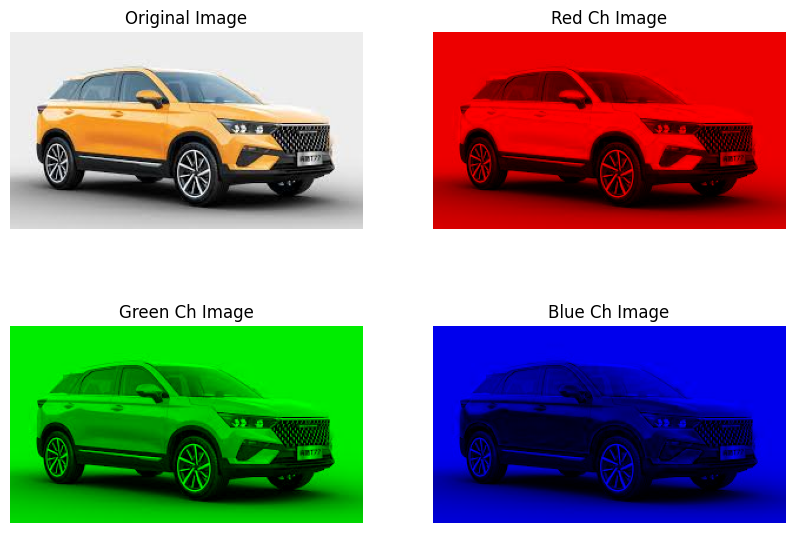

In [20]:
viusalize_RGB_channel(imgArray=car1_cv2)

In [21]:
random_colored_img = np.random.randint(0, 255, (6,6,3))
random_colored_img.shape

(6, 6, 3)

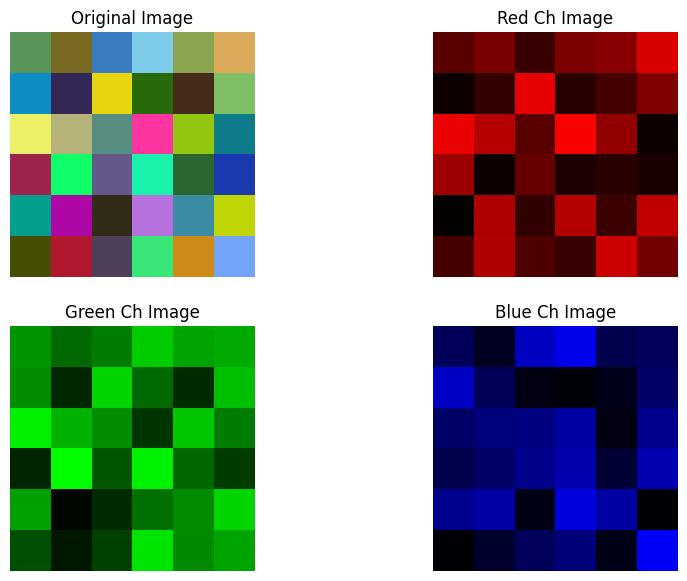

In [22]:
viusalize_RGB_channel(imgArray=random_colored_img)

In [23]:
# [[[0,0],[0,1]],
# [[1,0],[1,1]]]

In [24]:
# [[[0,0],[0,1],[1,0],[1,1]]]a

# Understanding Filters

In [25]:
sobel = np.array([[ 1, 0,-1],
                  [ 2, 0,-2],
                  [ 1, 0,-1]])

print("highlighting Vertical edges:\n", sobel)

highlighting Vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [26]:
print("highlighting Horizontal edges:\n", sobel.T)


highlighting Horizontal edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [27]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example1 = np.array(example1)

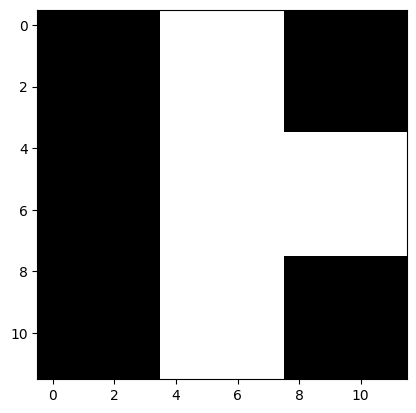

In [28]:
plt.imshow(example1, cmap="gray")

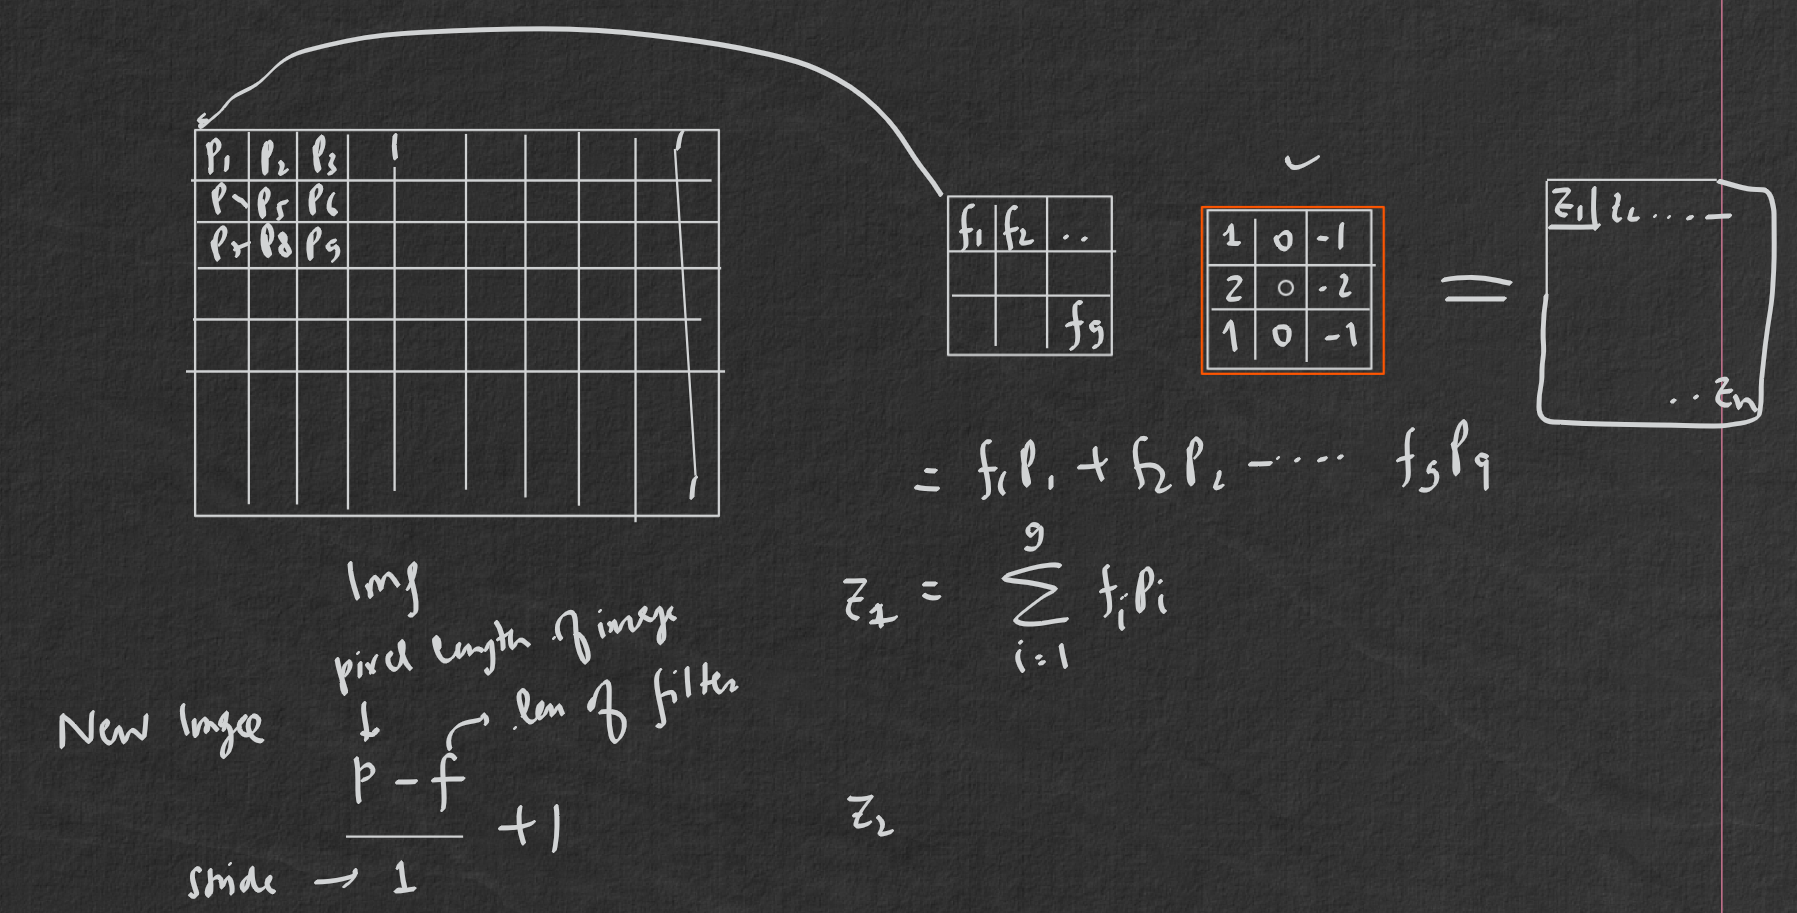

In [29]:
def simple_conv(imgFilter=None, picture=None):
  # extract the shape of the image
  p_row, p_col = picture.shape

  k = imgFilter.shape[0] # k =3
  
  temp = list()

  stride = 1

  # resulant image size
  final_cols = (p_col - k)//stride + 1
  final_rows = (p_row - k)//stride + 1

  # take vertically down stride across row by row
  for v_stride in range(final_rows):
    # take horizontal right stride across col by col
    for h_stride in range(final_cols):
      target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
      z = sum(sum(imgFilter * target_area_of_pic))
      temp.append(z)
  
  resulant_image = np.array(temp).reshape(final_rows, final_cols)
  return resulant_image

In [30]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

In [31]:
sobel

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [32]:
k = 3
v_stride = 0
h_stride = 0 + 1 + 1
target_area = example1[v_stride: v_stride + k, h_stride: h_stride + k]
target_area

array([[  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [33]:
sum(sum(target_area*sobel))

-1020

In [34]:
result = simple_conv(imgFilter=sobel, picture=example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

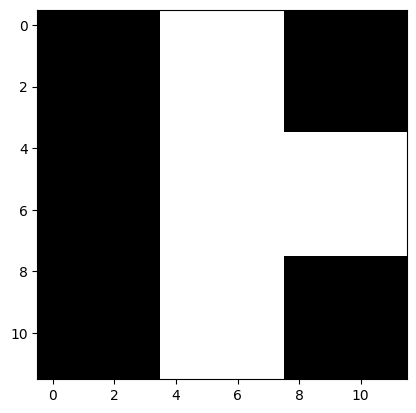

In [35]:
plt.imshow(example1, cmap="gray")

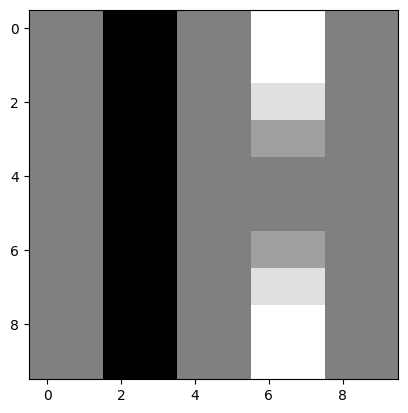

In [36]:
plt.imshow(result, cmap="gray")

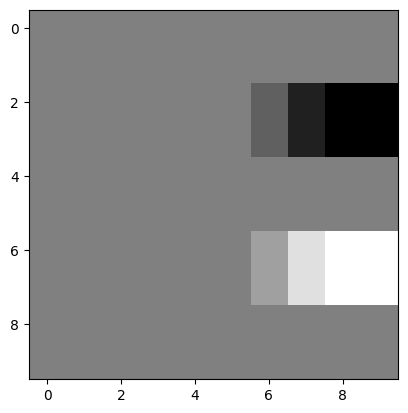

In [37]:
result = simple_conv(imgFilter=sobel.T, picture=example1)
plt.imshow(result, cmap="gray")

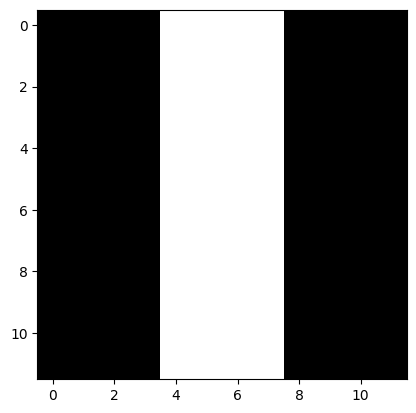

In [38]:
example2 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example2 = np.array(example2)
plt.imshow(example2, cmap="gray")

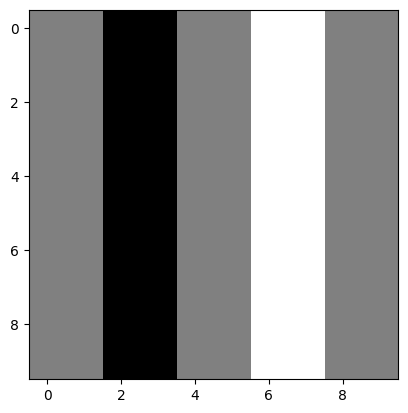

In [39]:
result = simple_conv(imgFilter=sobel, picture=example2)
plt.imshow(result, cmap="gray")

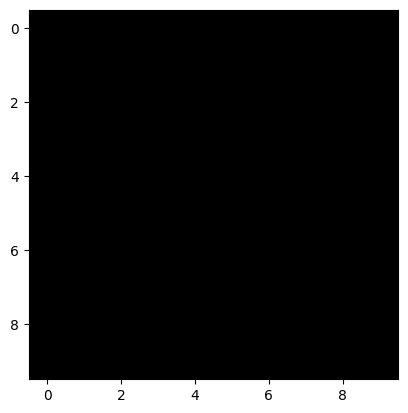

In [40]:
result = simple_conv(imgFilter=sobel.T, picture=example2)
plt.imshow(result, cmap="gray")

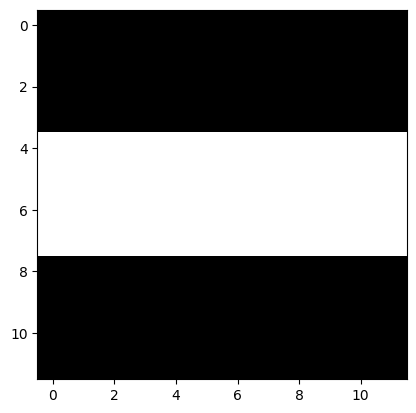

In [41]:

example2_T = np.array(example2.T)
plt.imshow(example2_T, cmap="gray")

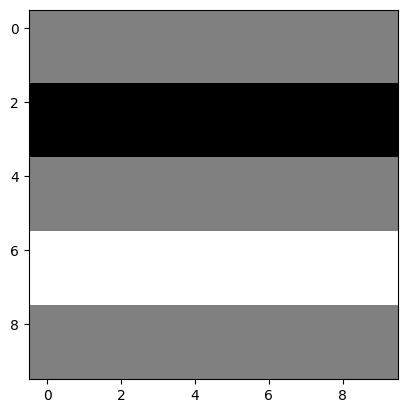

In [42]:
result = simple_conv(imgFilter=sobel.T, picture=example2_T)
plt.imshow(result, cmap="gray")

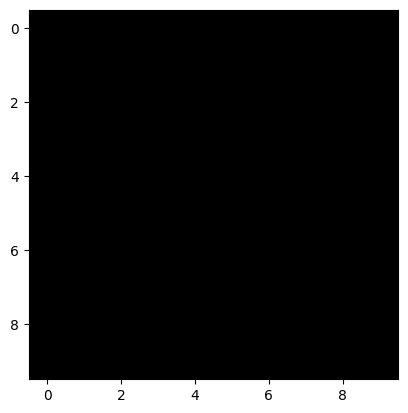

In [43]:
result = simple_conv(imgFilter=sobel, picture=example2_T)
plt.imshow(result, cmap="gray")

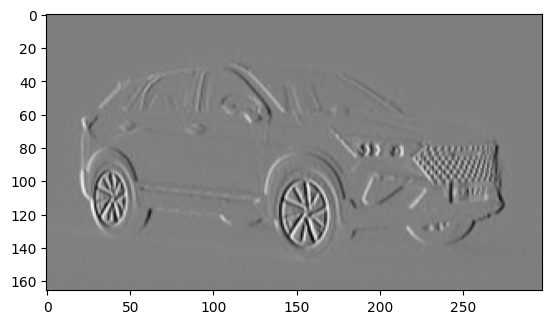

In [44]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

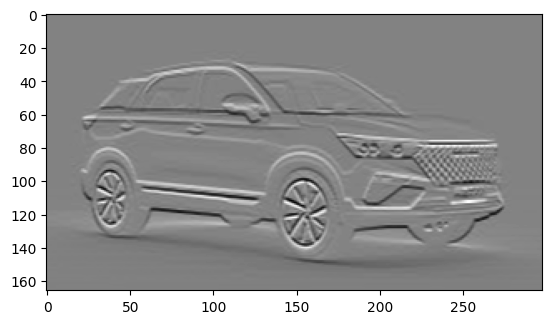

In [45]:
result = simple_conv(imgFilter=sobel.T, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [46]:
car1_cv2_BGR_GRAY.shape

(168, 300)

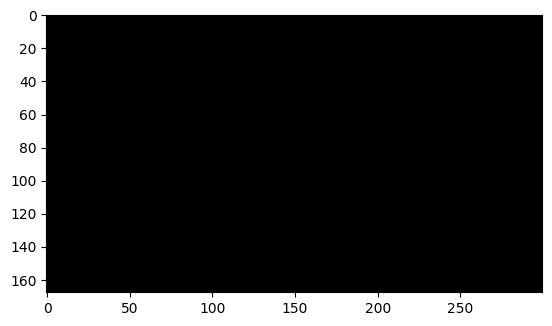

In [47]:
nothing = np.zeros(car1_cv2_BGR_GRAY.shape)
plt.imshow(nothing, cmap="gray")

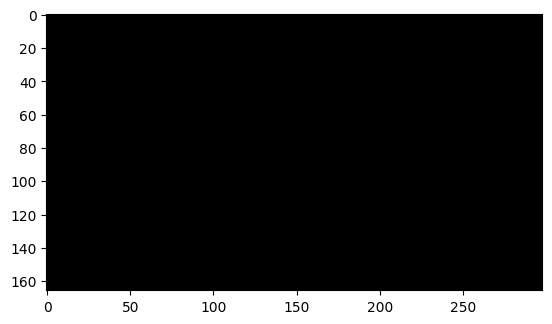

In [48]:
result = simple_conv(imgFilter=sobel.T, picture=nothing)
plt.imshow(result, cmap="gray")

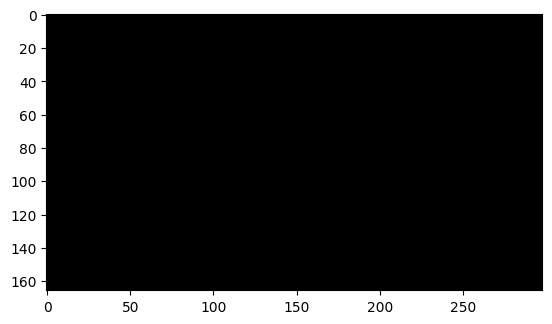

In [49]:
result = simple_conv(imgFilter=sobel, picture=nothing)
plt.imshow(result, cmap="gray")

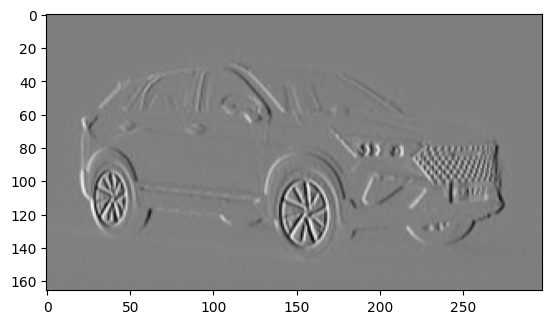

In [50]:
result = simple_conv(imgFilter=sobel, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")

In [53]:
random_f = np.random.randn(3,3)
random_f

array([[-0.19630814, -1.1080626 , -1.45107229],
       [ 0.64485153, -0.23604603, -1.12664547],
       [ 1.50519588,  0.91321162, -0.82172117]])

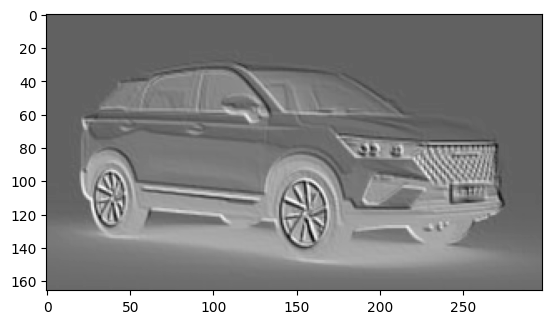

In [54]:
result = simple_conv(imgFilter=random_f, picture=car1_cv2_BGR_GRAY)
plt.imshow(result, cmap="gray")